In [41]:
import pandas as pd

merged_results = pd.read_excel('all_merged_data.xlsx')

In [42]:
opposite_dereg_mask = merged_results['Gene'].isin(['YALI0_C13178g', 'YALI0_E24277g', 'YALI0_B13640g', 'YALI0_D14872g', 'YALI0_C20977g', 
                                             'YALI0_B00660g', 'YALI0_C18645g', 'YALI0_B21582g', 'YALI0_E20251g', 'YALI0_B13354g', 
                                             'YALI0_A18469g', 'YALI0_C16863g'])
opposite_dereg = merged_results[opposite_dereg_mask]

'''opposite_dereg["order"] = opposite_dereg.iloc[:, 4:13].mean(axis=1)
opposite_dereg = opposite_dereg.sort_values(by='order')'''

print(opposite_dereg)


    Unnamed: 0           Gene TF number Assigned name  scSoA  scYFP  inYFP  \
1            1  YALI0_E20251g     TF136             -  -1.22  -0.70   0.00   
3            3  YALI0_C18645g     TF121             -   0.84   0.00   0.00   
7            7  YALI0_D14872g     TF034             -  -2.15  -0.64   1.30   
10          10  YALI0_E24277g     TF049             -   0.43   0.00   0.00   
14          14  YALI0_B00660g     TF003             -  -0.98  -0.62   0.50   
15          15  YALI0_B21582g     TF095          MHY1  -1.15  -0.84   0.00   
30          30  YALI0_C20977g     TF141             -  -0.81   0.00   0.00   
41          41  YALI0_B13354g     TF105             -  -0.37  -0.37   0.00   
45          45  YALI0_C13178g     TF019             -  -0.43   0.00   0.00   
53          53  YALI0_A18469g     TF099          HOY1  -0.41  -0.68   0.42   
62          62  YALI0_B13640g     TF008        RIM101  -0.20   0.00   0.29   
63          63  YALI0_C16863g     TF022          SKO1  -0.26  -0

In [43]:
opposite_dereg['HSS_sum'] = opposite_dereg['scSoA'] + opposite_dereg['scYFP']
opposite_dereg['UPR_sum'] = opposite_dereg['inYFP'] + opposite_dereg['scTlG']
opposite_dereg = opposite_dereg.sort_values(by=['HSS_sum'])
print(opposite_dereg)

    Unnamed: 0           Gene TF number Assigned name  scSoA  scYFP  inYFP  \
7            7  YALI0_D14872g     TF034             -  -2.15  -0.64   1.30   
15          15  YALI0_B21582g     TF095          MHY1  -1.15  -0.84   0.00   
1            1  YALI0_E20251g     TF136             -  -1.22  -0.70   0.00   
14          14  YALI0_B00660g     TF003             -  -0.98  -0.62   0.50   
53          53  YALI0_A18469g     TF099          HOY1  -0.41  -0.68   0.42   
30          30  YALI0_C20977g     TF141             -  -0.81   0.00   0.00   
41          41  YALI0_B13354g     TF105             -  -0.37  -0.37   0.00   
63          63  YALI0_C16863g     TF022          SKO1  -0.26  -0.28   0.00   
45          45  YALI0_C13178g     TF019             -  -0.43   0.00   0.00   
62          62  YALI0_B13640g     TF008        RIM101  -0.20   0.00   0.29   
10          10  YALI0_E24277g     TF049             -   0.43   0.00   0.00   
3            3  YALI0_C18645g     TF121             -   0.84   0

C:\Users\User\AppData\Local\Temp\ipykernel_54684\1687394985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opposite_dereg['HSS_sum'] = opposite_dereg['scSoA'] + opposite_dereg['scYFP']
C:\Users\User\AppData\Local\Temp\ipykernel_54684\1687394985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opposite_dereg['UPR_sum'] = opposite_dereg['inYFP'] + opposite_dereg['scTlG']


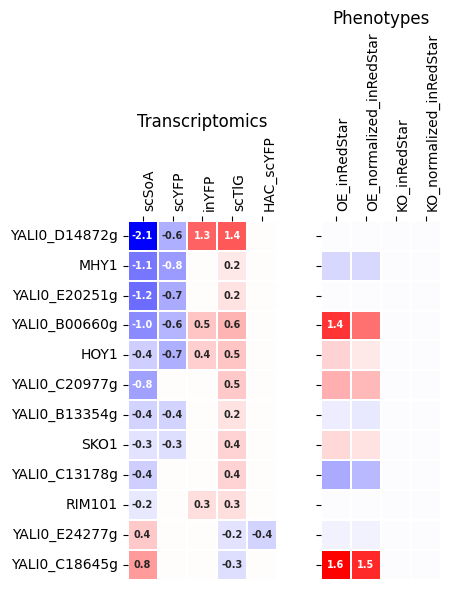

In [53]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


# Define the numeric data and row labels
numeric_data1 = opposite_dereg.iloc[:, 4:9]
numeric_data2 = opposite_dereg.iloc[:, 9:13]

row_labels = [gene if assigned_name == '-' else assigned_name 
              for assigned_name, gene in zip(opposite_dereg['Assigned name'], opposite_dereg['Gene'])]

# Create a custom colormap
colors = ['blue', 'white', 'red']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

annot_kws = {"size": 7, "weight": "bold"}


# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 6), sharey=True)

# Plot the first heatmap
annot_data1 = numeric_data1.map(lambda x: f'{x:.1f}' if x != 0 else '')

# Create a blank annotation matrix for numeric_data2
annot_data2 = pd.DataFrame('', index=numeric_data2.index, columns=numeric_data2.columns)

# Specify annotations for chosen variants
annotations2 = {
    'OE_inRedStar': ['TF003', 'TF037', 'TF068', 'TF119', 'TF121', 'TF124', 'TF126', 'TF128'],
    'OE_normalized_inRedStar': ['TF037', 'TF068', 'TF121', 'TF124', 'TF126', 'TF128'],
    'KO_inRedStar': ['TF033', 'TF037', 'TF054', 'TF068', 'TF080', 'TF120', 'TF128'],
    'KO_normalized_inRedStar': ['TF033', 'TF037', 'TF054', 'TF068', 'TF120', 'TF128']
}

# Add annotations based on specified genes
for column, genes in annotations2.items():
    for gene in genes:
        if gene in opposite_dereg['TF number'].values:
            annot_data2.loc[opposite_dereg['TF number'] == gene, column] = numeric_data2.loc[opposite_dereg['TF number'] == gene, column].apply(lambda x: f'{x:.1f}')


sns.heatmap(numeric_data1, ax=ax1, xticklabels=True, yticklabels=row_labels, cmap=cmap, center=0, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data1, fmt='', annot_kws=annot_kws)
ax1.xaxis.tick_top()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='left')
ax1.set_title('Transcriptomics')

# Plot the second heatmap
sns.heatmap(numeric_data2, ax=ax2, xticklabels=True, yticklabels=row_labels, cmap=cmap, center=1, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data2, fmt='', annot_kws=annot_kws)
ax2.xaxis.tick_top()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='left')
ax2.set_title('Phenotypes')


# Adjust the layout
plt.tight_layout()
#plt.savefig('subheatmap_opposite.png')
